In [7]:
#importation du dataset a l'aide de pandas
import pandas as pd
df = pd.read_csv("mobile_price.csv", encoding = "iso.8859-1")
#affichage de l'en-tête
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [8]:
#affichage des informations générales sur les colonnes de données et les valeur
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [3]:
#recherche des informations manquantes
df.isnull().sum()

battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range    0
dtype: int64

<AxesSubplot:>

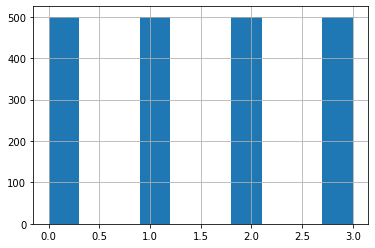

In [9]:
#étude la distribution des caractéristiques les plus importantes en fonction de votre compréhension del'ensemble de données et du problème
import seaborn as sns
df['price_range'].hist()

<AxesSubplot:>

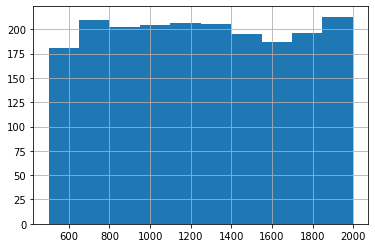

In [11]:
#étude la distribution des caractéristiques les plus importantes en fonction de votre compréhension del'ensemble de données et du problème
import seaborn as sns
df['px_width'].hist()

In [12]:
df['mobile_wt'].describe()

count    2000.000000
mean      140.249000
std        35.399655
min        80.000000
25%       109.000000
50%       141.000000
75%       170.000000
max       200.000000
Name: mobile_wt, dtype: float64

In [13]:
#Corrélation price_range
df['price_range'].corr(df['clock_speed'])

-0.006605690881732061

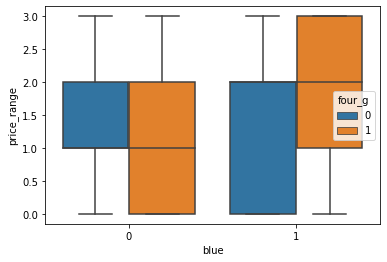

In [15]:
#Visualisation de la corrélation entre le price_range et le battery_power dans un graphique de votre choix
import seaborn as sns
ax = sns.boxplot(x=df['blue'], y=df['price_range'], hue='four_g', data=df)

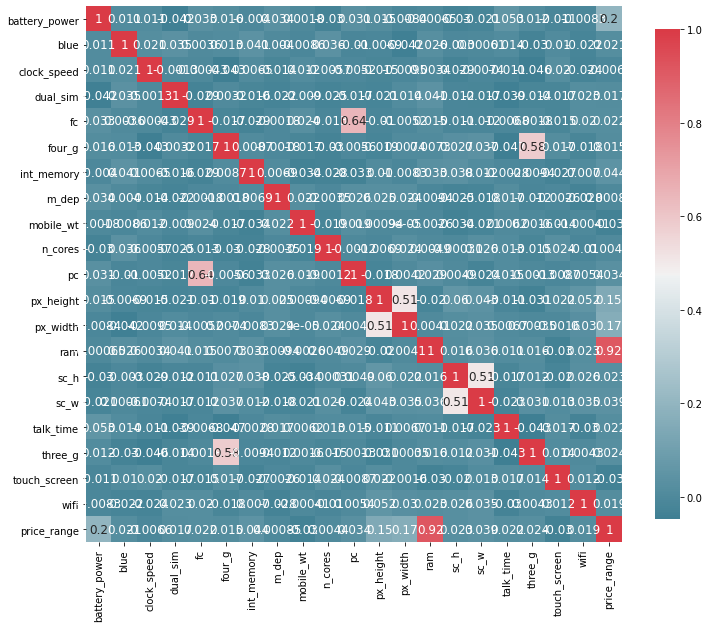

In [16]:
import matplotlib.pyplot as plt
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )
plot_correlation_map( df )

In [18]:
#Selection de caractéristique
df.corr()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


In [21]:
#in our data frame we consider that the most important characteristics are:
# price_range, battery_power, clock_speed, dual_sim, int_memory
df=df[['price_range','battery_power','clock_speed','dual_sim','int_memory']]
df

,price_range,battery_power,clock_speed,dual_sim,int_memory
0,1,842,2.2,0,7
1,2,1021,0.5,1,53
2,2,563,0.5,1,41
3,2,615,2.5,0,10
4,1,1821,1.2,0,44
...,...,...,...,...,...
1995,0,794,0.5,1,2
1996,2,1965,2.6,1,39
1997,3,1911,0.9,1,36
1998,0,1512,0.9,0,46


In [22]:
#Divisez votre ensemble de données en un ensemble d'apprentissage et un ensemble de test
from sklearn.model_selection import train_test_split
Y=df['price_range']
X=df[['battery_power','clock_speed','dual_sim','int_memory']]
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30,random_state=40)

In [23]:
#Appliquez la régression linéaire à votre ensemble d'entraînement
#importation des librairies
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [24]:
#extraire X et Y de notre donnée
X=df['clock_speed'].values[:,np.newaxis]
Y=df['price_range'].values
#fractionnement des données avec une taille de test de 30%
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30,random_state=40)

model=LinearRegression()
model.fit(X_train,Y_train)
predicted=model.predict(X_test)

print('MSE',mean_squared_error(Y_test,predicted))
print('Rsquared',metrics.r2_score(Y_test,predicted))

MSE 1.2891397150467465
Rsquared -0.0036207601311994964


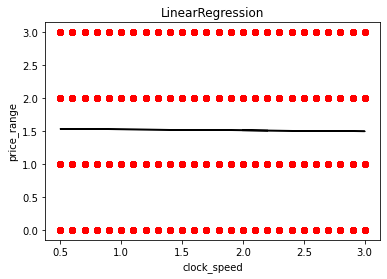

In [25]:
#Tracez la régression linéaire
plt.scatter(X,Y,color='r')
plt.title('LinearRegression')
plt.ylabel('price_range')
plt.xlabel('clock_speed')
plt.plot(X,model.predict(X),color='k')
plt.show()

In [26]:
#Mesurez les performances de la régression linéaire à l'aide de l'ensemble de test
model.score(X_test, Y_test)

-0.0036207601311994964

In [27]:
#Appliquez une régression multilinéaire et comparez-la au modèle linéaire
#extraire X et Y de notre donnée
X=df[['battery_power','clock_speed','dual_sim','int_memory']]
Y=df['price_range'].values
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30,random_state=40)

model=LinearRegression()
model.fit(X_train,Y_train)
predicted=model.predict(X_test)

print('MSE',mean_squared_error(Y_test,predicted))
print('Rsquared',metrics.r2_score(Y_test,predicted))

MSE 1.259579415052992
Rsquared 0.01939251795120167


In [28]:
#performance du modèle multilinéaire
model.score(X_test, Y_test)

0.01939251795120167